<a href="https://colab.research.google.com/github/VarunMadhav/StockPredict/blob/master/newstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [3]:
pip install keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,45.880001,46.087502,45.070000,45.772499,44.174919,154449200
1,2019-05-21,46.305000,47.000000,46.174999,46.650002,45.021790,113459200
2,2019-05-22,46.165001,46.427502,45.637501,45.695000,44.100105,118994400
3,2019-05-23,44.950001,45.134998,44.452499,44.915001,43.347347,146118800
4,2019-05-24,45.049999,45.535000,44.654999,44.742500,43.180859,94858800
...,...,...,...,...,...,...,...
1255,2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
1256,2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
1257,2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200
1258,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41260800


In [9]:
df1 = df.reset_index()['Close']

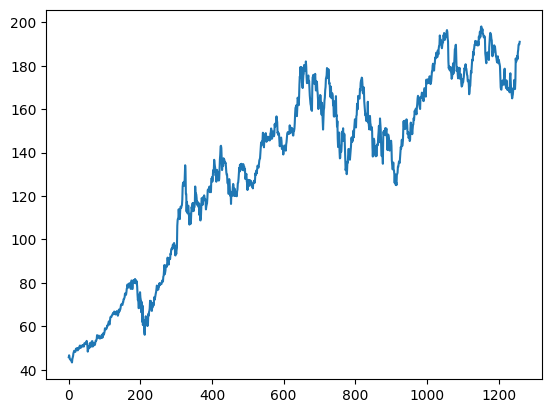

In [10]:
plt.plot(df1)
plt.show()

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [12]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 314ms/step - loss: 0.0974 - val_loss: 0.0255
Epoch 2/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0140 - val_loss: 0.0017
Epoch 3/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0072 - val_loss: 0.0205
Epoch 4/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 5/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 6/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 7/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 9/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0019 - val_l

In [18]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

11/11 [==============================] - 0s 32ms/step


In [19]:
print(f"Train RMSE: {math.sqrt(mean_squared_error(y_train, train_predict))}")
print(f"Test RMSE: {math.sqrt(mean_squared_error(ytest, test_predict))}")

Train RMSE: 125.54567533763354
Test RMSE: 171.1692862716244


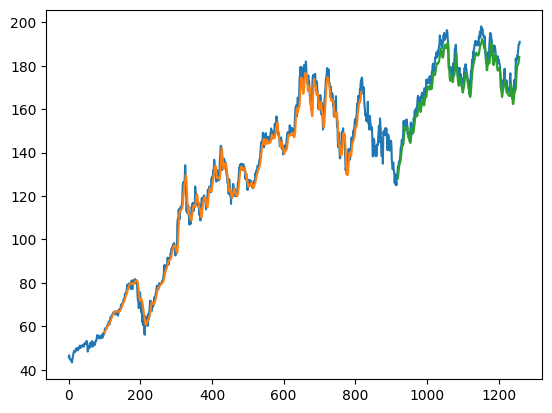

In [20]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [21]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

In [22]:
lst_output = []
n_steps = time_step
i = 0
while i < 200:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [24]:
predicted_value_after_200_days = scaler.inverse_transform(np.array(lst_output[-1]).reshape(-1, 1))

In [25]:
print(f"Predicted stock value after 200 days: {predicted_value_after_200_days[0][0]}")

Predicted stock value after 200 days: 106.52176713271238
